In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

In [2]:
import seaborn as sns

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
from sklearn.model_selection import train_test_split

In [82]:
from sklearn import linear_model

# Chp1: Supervised Learning
Arguably most important branch of machine learning

## Machine Learning
- the art and science of:
    - Giving computers the ability to learn to make decisions from data without being explicitly programmed!
Examples:
- predicting if email is spam or not
- clustering wikipedia entries into different categories

Labels Present: supervised learning
Labels not present: unsupervised learning

## Unsupervised learning
- uncovering hidden patterns from unlabeled data
    - grouping customers into disticnt categories (Clustering) without knowing in advanced what those categories might be.
### Reinforcement Learning
- Software agents interact with an environment
    - learn how to optimize their behavior
    - Given a system of rewards and punishments
        - inspired from behavioral psychology
    - Applications: Economics, Genetics, Game playing
        - AlphaGo: First computer to defeat the world champion in Go
## Supervised learning
- predictor variables/features and a 
- target variable
Row with data points and columns with features

Aim: predict the target variable, given the predictor variables
- Classification: Target variable consists of categories
- Regression: Target variable is continuous

#### (Naming Conventions)
Features = predictor variables = independent var.
Target Var. = dependent var = response variable

- Automate time-consuming or expensive manual tasks
    - Example: Doctor's diagnosis
- Make predictions about the future
    - Example: Will a customer click on an ad or not?
- Requires LABELED DATA
    - historical data with labels
    - experiments to get labeled data
    - crowd-sourcing labeled data
### Supervised learning in Python
scikit-learn/sklearn
- most approachable and userfriendly
- integrates well with SciPy stack
Other libraries
- TensorFlow
- keras
    - worth checking out when you're good with the basics

## Exploratory data analysis (EDA)
iris dataset

In [3]:
iris = pd.read_csv('https://raw.githubusercontent.com/pandas-dev/pandas/master/pandas/tests/data/iris.csv')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#Iris Features:
iris.columns[:-1]

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'], dtype='object')

In [5]:
#Target Variable: 
iris.Name.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
from sklearn import datasets

In [7]:
plt.style.use('ggplot')
#Cause it looks great, and it makes R-fans feel comfy

In [8]:
irisskl = datasets.load_iris()
type(irisskl)
#Bunch is like a dict with key-value pairs

sklearn.utils.Bunch

In [9]:
print(irisskl.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [10]:
type(irisskl.data), type(irisskl.target)

(numpy.ndarray, numpy.ndarray)

In [11]:
irisskl.data.shape
#samples are rows
#features are columns

(150, 4)

In [12]:
irisskl.target_names

array(['setosa', 'versicolor', 'virginica'],
      dtype='<U10')

In [13]:
X = irisskl.data
y = irisskl.target
irisskl_df = pd.DataFrame(X, columns = irisskl.feature_names)
print(irisskl_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


/Users/paulomartinez/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  This is separate from the ipykernel package so we can avoid doing imports until


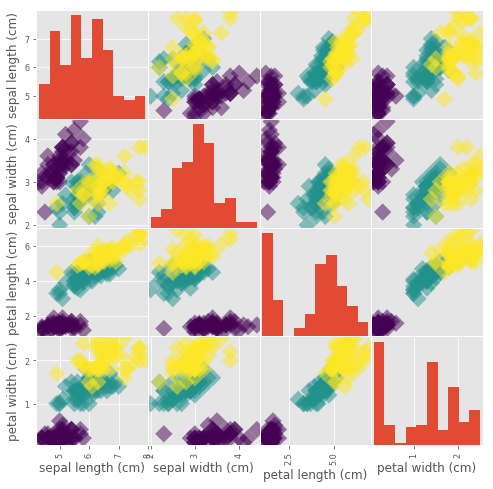

In [14]:
_ = pd.scatter_matrix(irisskl_df, c = y, #color features by species
                      figsize = [8, 8], 
                     s = 150, marker = 'D')
plt.show()
#diagonal is histogram of features
# off-diagonal are scatterplots of the column feature vs row feature 
# colored by the target variable

## Numerical EDA
data from UCI Machine Learing Repository
- votes made by US House of Reps
Goal: predict party affiliation based on how they voted
- dataset has been preprocessed to deal with missing values!!!

In [15]:
path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'
df = pd.read_csv(path, na_values = '?', names = ['party', 'infants', 'water', 'budget',
                                'physician', 'salvador', 'religious',
                                'satellite', 'aid', 'missile', 'immigration',
                                'synfuels', 'education', 'superfund', 'crime',
                                'duty_free_exports', 'eaa_rsa'])

In [16]:
df.replace('n', 0, inplace=True)

In [17]:
df.replace('y', 1, inplace=True)

In [18]:
df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
party                435 non-null object
infants              423 non-null float64
water                387 non-null float64
budget               424 non-null float64
physician            424 non-null float64
salvador             420 non-null float64
religious            424 non-null float64
satellite            421 non-null float64
aid                  420 non-null float64
missile              413 non-null float64
immigration          428 non-null float64
synfuels             414 non-null float64
education            404 non-null float64
superfund            410 non-null float64
crime                418 non-null float64
duty_free_exports    407 non-null float64
eaa_rsa              331 non-null float64
dtypes: float64(16), object(1)
memory usage: 57.9+ KB


In [20]:
df.describe()

,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
count,423.000000,387.000000,424.000000,424.000000,420.000000,424.000000,421.000000,420.00000,413.000000,428.000000,414.000000,404.000000,410.000000,418.000000,407.000000,331.000000
mean,0.442080,0.503876,0.596698,0.417453,0.504762,0.641509,0.567696,0.57619,0.501211,0.504673,0.362319,0.423267,0.509756,0.593301,0.427518,0.812689
std,0.497222,0.500632,0.491140,0.493721,0.500574,0.480124,0.495985,0.49475,0.500605,0.500563,0.481252,0.494690,0.500516,0.491806,0.495327,0.390752
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


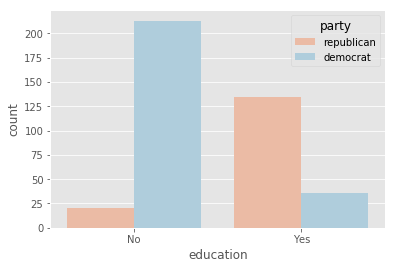

In [21]:
plt.figure()
sns.countplot(x='education', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

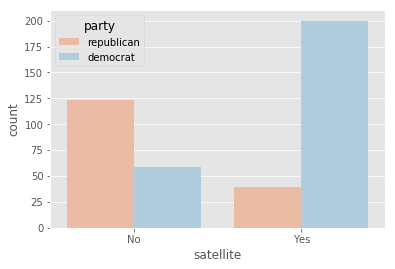

In [22]:
plt.figure()
sns.countplot(x='satellite', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

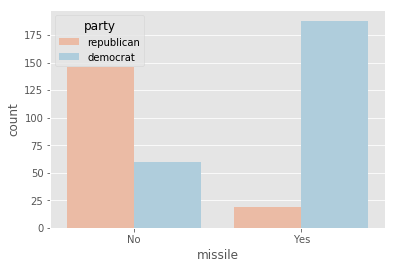

In [23]:
plt.figure()
sns.countplot(x='missile', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

## Classification Challenge
Take unlabeled data as input and output a label
1. learn from the already labeled data : Training data

### k-Nearest Neighbors
- basic idea: predic the label of a data point by 
    - looking at the 'k' closes labeled data points
    - taking a majority vote from them
    

In [24]:
iris.head(2)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


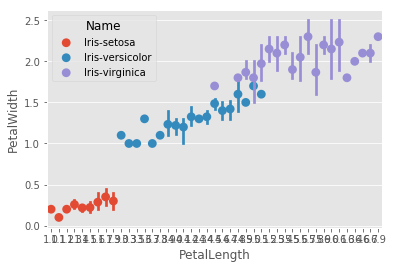

In [25]:
iris = pd.read_csv('https://raw.githubusercontent.com/pandas-dev/pandas/master/pandas/tests/data/iris.csv')
#non scikitlearn iris

sns.pointplot('PetalLength', 'PetalWidth', 
              marker = '.',
              linestyles='none',
              hue = 'Name',
           data = iris)
plt.show()
#decision boundaries will demarcate "regions" to assign predictions

## Scikit-learn fit and predict
- All machine learning models implemented as Python classes
    - They implement the algorithms for learning and predicting
    - Store the information learned from the data
- Training a model on the data = 'fitting' a model to the data
    - .fit() #method
- To predict the labels of new data:
    - .predict() #method
## Using scikit-learn to fit a classifier


In [27]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 6)

knn.fit(irisskl['data'], irisskl['target']) #fit the model/classifier to the data
# features and target (respectively) as np array
# requires features to take on continuous values (not categorical)
# also requires no missing values

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [31]:
irisskl['data'].shape

(150, 4)

In [32]:
irisskl['target'].shape

(150,)

now that the classifier has been fit to our data we can use it for
## Predicting on unlabeled data
set of observations X_new (the new data we will pass for prediction)

### k-Nearest Neighbors: Fit
fit a knn classifier to the congressional dataset df
- Requirements
    - features in tidy-data arrays
    - target neads to be a single column with same number of observations as the feauture data

In [35]:
df.dropna(inplace = True)#drop NAs

In [36]:
# Create arrays for the features and the response variable
y = df['party'].values
X = df.drop('party', axis=1).values

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors = 6)

# Fit the classifier to the data
knn.fit(X, y) #fit the model/classifier to the data

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [37]:
# Predict the labels for the training data X
y_pred = knn.predict(X)
print("Prediction : {}".format(y_pred))
#this is ofcourse trivially accurate since we are predicting 
#the model we trained on


# Predict and print the label for the new data point X_new
#new_prediction = knn.predict(X_new)
#print("Prediction: {}".format(new_prediction))


Prediction : ['republican' 'republican' 'democrat' 'democrat' 'democrat' 'democrat'
 'democrat' 'republican' 'democrat' 'republican' 'democrat' 'republican'
 'democrat' 'republican' 'republican' 'republican' 'democrat' 'democrat'
 'democrat' 'democrat' 'democrat' 'democrat' 'republican' 'republican'
 'republican' 'republican' 'republican' 'republican' 'democrat'
 'republican' 'republican' 'republican' 'democrat' 'democrat' 'republican'
 'democrat' 'republican' 'republican' 'democrat' 'republican' 'republican'
 'republican' 'republican' 'republican' 'republican' 'democrat' 'democrat'
 'democrat' 'democrat' 'democrat' 'democrat' 'democrat' 'democrat'
 'democrat' 'democrat' 'republican' 'democrat' 'democrat' 'republican'
 'democrat' 'republican' 'republican' 'democrat' 'republican' 'republican'
 'republican' 'democrat' 'democrat' 'republican' 'republican' 'republican'
 'democrat' 'republican' 'democrat' 'republican' 'democrat' 'democrat'
 'republican' 'republican' 'republican' 'republican

## Measuring model performance
- In classification, accuracy is a commonly used metric
- Accuracy = Fraction of correct predictions
    - but which data
- How well will model predict new data?
### Split data
- fit/train on training set
- make predictions on test set
- compare predictions to measure accuracy

In [ ]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,
                random_state = 21, stratify = y)
#random_state decides where to split
#returns 4 arrays: training data, test data, 
#training labels, test labels

#It's very important that the test and train datasets have the 
#same distribution of values, otherwise the skew of the training 
#set's distribution will import a bias

In [43]:
knn = KNeighborsClassifier(n_neighbors=8)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [2 1 2 2 1 0 2 0 0 2 0 2 0 1 2 0 0 0 1 0 2 2 2 0 1 1 1 0 0 1 2 2 0 0 2 2 1
 2 1 2 2 1 1 1 1]


In [44]:
knn.score(X_test, y_test)

0.80000000000000004

## Model complexity
- larger k = smoother decision boundary = less complex model
- smaller k = more complex model = can lead to overfitting

## The digits recognition dataset

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

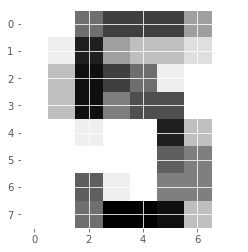

In [45]:
# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits.DESCR)

# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [46]:
# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))


0.983333333333


In [51]:
score_by_neighbor = []
for i in range(0, 40):
    # Create feature and target arrays
    X = digits.data
    y = digits.target
    
    # Split into training and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)
    
    # Create a k-NN classifier with 7 neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=i+1)
    
    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    # Print the accuracy
    #print(knn.score(X_test, y_test))
    score_by_neighbor.append(knn.score(X_test, y_test))
    

0.986111111111
0.986111111111
0.986111111111
0.983333333333
0.983333333333
0.980555555556
0.983333333333
0.977777777778
0.980555555556
0.977777777778
0.977777777778
0.975
0.975
0.977777777778
0.975
0.977777777778
0.969444444444
0.969444444444
0.966666666667
0.966666666667
0.963888888889
0.961111111111
0.963888888889
0.958333333333
0.961111111111
0.961111111111
0.961111111111
0.961111111111
0.961111111111
0.961111111111
0.961111111111
0.961111111111
0.961111111111
0.961111111111
0.961111111111
0.961111111111
0.955555555556
0.955555555556
0.955555555556
0.955555555556


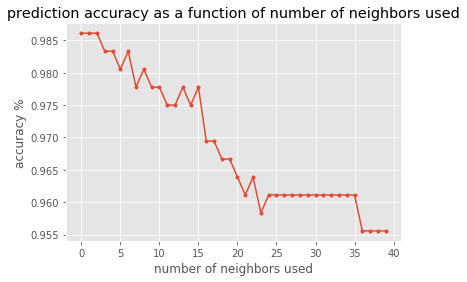

In [53]:
plt.plot(np.array(score_by_neighbor), marker = '.')
plt.title('prediction accuracy as a function of number of neighbors used')
plt.ylabel('accuracy %')
plt.xlabel('number of neighbors used')
plt.show()
#notice the increasingly detrimental effect of overfitting
    #I reckon we could classify datasets by whether or not they 
    #have optimization that is proportional or inversely proportional
    #to the number of neighbors used

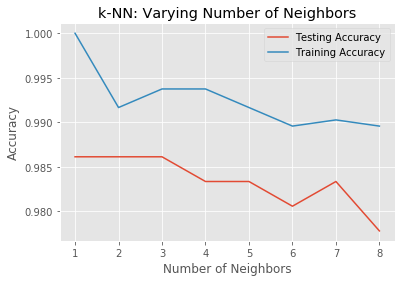

In [54]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

# Chp. 2 Introduction to Regression
target variable is continous (not discrete)

In [70]:
path = 'https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv'
boston = pd.read_csv(path)
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
#crim is per capita crime rate
# nox is nitrous oxide concentration
# avg rooms per toilet
# medv is median value of owner occupied home in thousands of dollars

In [72]:
# If you needed to drop values
X = boston.drop('medv', axis = 1).values
# separate out the target
y = boston['medv'].values
#.values returns the required np.array

In [74]:
#slice the number of rooms column
X_rooms = X[:, 5]
type(X_rooms)

numpy.ndarray

In [75]:
type(y)

numpy.ndarray

In [76]:
#reshape them to the desired shape
y = y.reshape(-1, 1)
X_rooms = X_rooms.reshape(-1, 1)

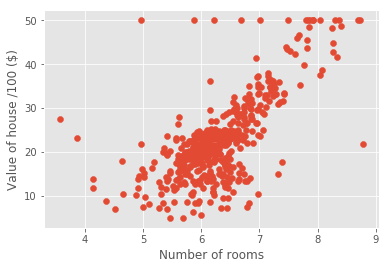

In [78]:
plt.scatter(X_rooms, y)
plt.ylabel('Value of house /100 ($)')
plt.xlabel('Number of rooms')
plt.show()

## Fitting a regression model to our data
first lets fit it and its predictions

In [79]:
bostonskl = datasets.load_boston()
bostonskl.target[:10] 
#median value of owner occupied homes in thousands of dolars

array([ 24. ,  21.6,  34.7,  33.4,  36.2,  28.7,  22.9,  27.1,  16.5,  18.9])

In [80]:
X = bostonskl.data
y = bostonskl.target
bostonskl_df = pd.DataFrame(X ,columns = bostonskl.feature_names)
bostonskl_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [81]:
# Print the keys and DESCR of the dataset
print(bostonskl.keys())
print(bostonskl.DESCR)

# Print the shape
print(bostonskl.data.shape)

dict_keys(['data', 'target', 'feature_names', 'DESCR'])
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,0

In [83]:
#from sklearn import linear_model
#import numpy as np

reg = linear_model.LinearRegression()
reg.fit(X_rooms, y) #(rooms and price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

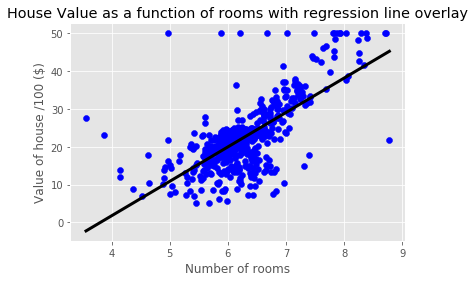

In [85]:
prediction_space = np.linspace(min(X_rooms),
                              max(X_rooms)).reshape(-1, 1)
plt.scatter(X_rooms, y, color = 'blue')
plt.plot(prediction_space, reg.predict(prediction_space),
        color = 'black', linewidth = 3)
plt.ylabel('Value of house /100 ($)')
plt.xlabel('Number of rooms')
plt.title('House Value as a function of rooms with regression line overlay')
plt.show()

# From the Scikitlearn website

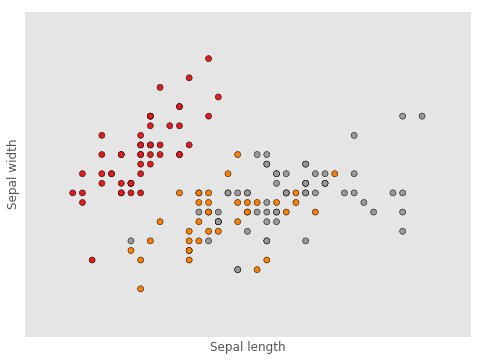

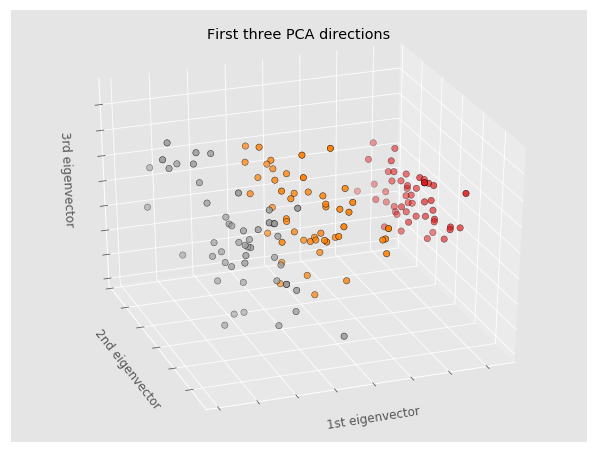

In [39]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()